# 1. Importing necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [2]:
import sys
sys.path.insert(0, '../preprocessing')
import Preprocessor

X_train, y_train, X_test, y_test = Preprocessor.file_read_vectorizer('../data/TrainingSet.csv', '../data/TestSet.csv')

# 2. Supervised Learning Algorithms

## 2.1. Machine Learning Approach

In [3]:
ml_running_time = []
accuracy = []

In [7]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=250, criterion='entropy', random_state=0)
lr = LogisticRegression(C=100, max_iter=10000, random_state=0)
svm = LinearSVC(C=100, max_iter=10000, random_state=0)
nb = MultinomialNB()
xgb = XGBClassifier(learning_rate=0.3, random_state=0)
voting = VotingClassifier(
                        estimators=[('lr', lr), ('rf', rf), ('nb', nb)], voting='soft')

for clf in (rf, lr, svm, nb, xgb, voting):
    s_time = time.time()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    e_time = time.time()
    
    accuracy.append(accuracy_score(y_test, y_pred))
    ml_running_time.append(e_time-s_time)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    print(f"Total running time: {e_time-s_time}")

RandomForestClassifier 0.8706
Total running time: 3090.0305259227753
LogisticRegression 0.9017
Total running time: 127.10784196853638
LinearSVC 0.9035
Total running time: 107.21510291099548
MultinomialNB 0.8871
Total running time: 0.44687724113464355
XGBClassifier 0.8515
Total running time: 157.16429996490479
VotingClassifier 0.9045
Total running time: 3237.678300142288


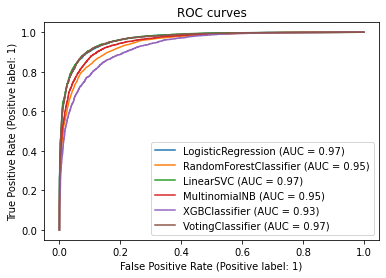

In [30]:
# plotting ROC curve
from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(lr, X_test, y_test)
plt.title("ROC curves")

for clf in (rf, svm, nb, xgb, voting):
    plot_roc_curve(clf, X_test, y_test, ax=disp.ax_)
    
plt.savefig('roc-curves.png')

# 3. Unsupervised Learning Algorithms